In [22]:
import numpy as np          
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold 

<Axes: >

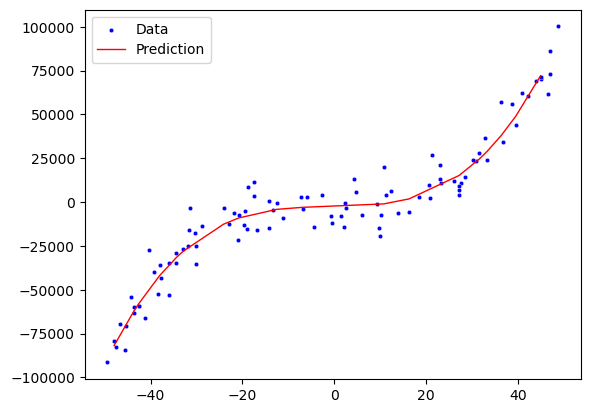

In [23]:
x=np.random.seed(42)
x=(np.random.rand(100)-0.5)*100

y=0.8*x**3+np.random.randn(100)*10000

x=x.reshape(-1,1)
y=y.reshape(-1,1)

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)


poly=PolynomialFeatures(degree=3)
x_trans=poly.fit_transform(x_train)

model=LinearRegression()
model.fit(x_trans, y_train)

y_predict=model.predict(poly.transform(x_test))


sns.scatterplot(x=x.flatten(), y=y.flatten(), color='blue', label='Data', s=10)
sns.lineplot(x=x_test.flatten(), y=y_predict.flatten(), color='red', label='Prediction', linewidth=1)


In [ ]:
print(model.coef_)
print(model.intercept_)


[[ 0.         33.61782291  2.41456207  0.75529261]]
[-2628.840243]


In [24]:
print(r2_score(y_test, y_predict))

0.9553161981316569


0.9173811246130041


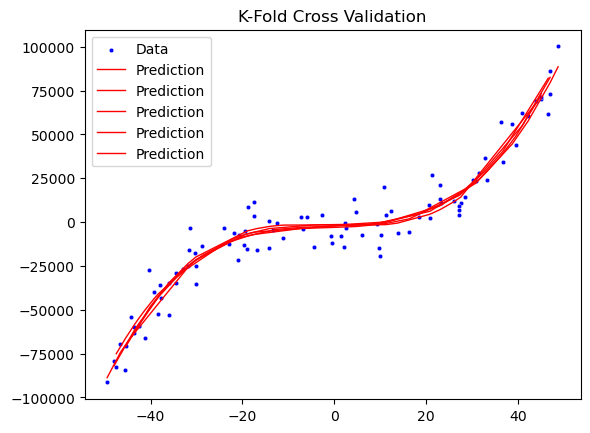

In [32]:
k_fold=KFold(n_splits=5, shuffle=True, random_state=42)

sns.scatterplot(x=x.flatten(), y=y.flatten(), color='blue', label='Data', s=10)
r2_score_array=[]

for train_index, test_index in k_fold.split(x):
    
    x_train, x_test= x[train_index], x[test_index]
    y_train, y_test= y[train_index], y[test_index]

    x_train=x_train.reshape(-1,1)
    y_train=y_train.reshape(-1,1)

    poly=PolynomialFeatures(degree=3)
    x_trans=poly.fit_transform(x_train)

    model=LinearRegression()
    model.fit(x_trans, y_train)

    y_predict=model.predict(poly.transform(x_test))

    r2_score_array.append(r2_score(y_test, y_predict))

    
    sns.lineplot(x=x_test.flatten(), y=y_predict.flatten(), color='red', label='Prediction', linewidth=1)


plt.title('K-Fold Cross Validation')

print(np.mean(r2_score_array))


    
    
